In [52]:
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

In [4]:
d_train = pd.read_csv('train.csv')

In [12]:
d_test = pd.read_csv('test.csv')

In [5]:
d_train.shape

(42000, 785)

In [6]:
d_train[1:5]

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The pizels are arranges in rows. The first column is the user designated label. To view the pixel images they have to be reshaped

In [ ]:
# Viewing a sample pixel
# Read the following for index based selection in Pandas
# https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/

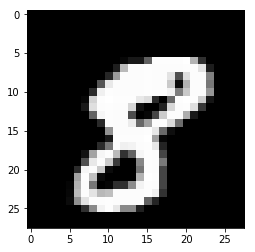

In [7]:
temp =  d_train.loc[10] #this produces a Pandas series
temp1 = temp[1:785].values.reshape(28,28) #this is how to reshape a Pandas series
plt.imshow(temp1, cmap = 'gray' ) # to plot the array has to be a numpy array
plt.show()

In [13]:
#Select the data to train
d1 = d_train.iloc[:,1:785] #select all rows and all but first column.
d1_labels = d_train.iloc[:,0]
# The first column contains the labels

In [42]:
import torch
import torch.nn as nn
import torchvision

#### Classification using SVM

In [3]:
class_svm = svm.SVC(gamma=0.001)

In [51]:
n_samples = d_train.shape[0]

Wall time: 0 ns


In [44]:
d_train_pixel = d_train.iloc[:,1:785] #the pixel data
d_train_label = d_train.iloc[:,0] # the labels 

In [ ]:
# Split the train data into training and validation sets
d_train_pixel1, d_train_pixel2, d_train_label1, d_train_label2 = train_test_split(d_train_pixel, d_train_label, test_size = 0.4)

<u> Info about the data </u>: <br>
d_train_pixel1 = pixel data for training <br>
d_train_label1 = the labels of the training data <br>
d_train_pixel2 = pixel data for validating <br>
d_train_label2 = the labels of the validating data

In [50]:
class_svm.fit(d_train_pixel1, d_train_label1)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [55]:
%%time
expected = d_train_label2
predicted = class_svm.predict(d_train_pixel2)
# print("Classification report for classifier %s:\n%s\n"
#       % (class_svm, metrics.classification_report(expected, predicted)))
# print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Wall time: 11min 23s
